# The Battle of Neighbourhoods - Toronto


## Introduction

This project will take a look at apartment rental prices in Toronto. Toronto, the provincial capital of Ontario and Canada's most populous city. According to Statistics Canada, Toronto reached a population of 2.93 billion in 2017, and the number is growing higher each year. With the growth opportunity, diverse culture, restuarants with cusines around the world, Toronto is the ultimate destimnation for lots of people. Toronto is famous for its high rental prices throughout Canada and maybe even North America. Being the big metropolitan in Canada, it is a city many people wants to move to. Due to the increased population in Toronto, a big concern for new arrivals will be the apartment rental prices in Toronto. This project will help them determine the average rental price in Toronto, and the different rental prices in different districts of Toronto.

### Problem Description

1) Average apartment rental prices in Toronto.  
2) Which district is cheaper to live in?  
3) Toronto rental trends over the years.

### Target Audience

New comers to Canada looking to settle down in Toronto, university students looking to rent apartments, individuals moving to Toronto from other Canadian cities will all be targetted audience and will find this project enlightening.

## Data

Data was extracted from:
https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/Table?TableId=2.2.11&GeographyId=2270&GeographyTypeId=3&DisplayAs=Table&GeograghyName=Toronto
  
The website provides data information on historial data on Toronto rental markets from 1990-2019. It also provide us information on the average rental prices in different regions and districts of the Toronto primary rental market.

### Methodology

A line graph will be used to examine the trend of Toronto primary rental market over the year 1990-2019. More over, the different pricing will also be compared and we will be able to determine which is the cheapest distrct to live in Toronto.

## Codes

In [1]:
import pandas as pd
import numpy as np

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files

import requests # library to handle requests
from requests import get

from bs4 import BeautifulSoup

import re

from time import sleep

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [2]:
source = requests.get('https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/Table?TableId=2.2.11&GeographyId=2270&GeographyTypeId=3&DisplayAs=Table&GeograghyName=Toronto').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>Full view</title>


Bachelor 
 1 Bedroom 
 2 Bedroom 
 3 Bedroom + 
 Total 
 
 
 
 1990 October 
 454 
 a 
 559 
 a 
 689 
 a 
 842 
 a 
 634 
 a 
 1991 October 
 482 
 a 
 592 
 a 
 730 
 a 
 888 
 a 
 672 
 a 
 1992 October 
 493 
 a 
 610 
 a 
 755 
 a 
 905 
 a 
 691 
 a 
 1993 October 
 510 
 a 
 627 
 a 
 773 
 a 
 930 
 a 
 710 
 a 
 1994 October 
 516 
 a 
 641 
 a 
 785 
 a 
 946 
 a 
 722 
 a 
 1995 October 
 531 
 a 
 661 
 a 
 805 
 a 
 965 
 a 
 741 
 a 
 1996 October 
 541 
 a 
 675 
 a 
 819 
 a 
 988 
 a 
 755 
 a 
 1997 October 
 555 
 a 
 685 
 a 
 822 
 a 
 989 
 a 
 762 
 a 
 1998 October 
 589 
 a 
 729 
 a 
 881 
 a 
 1,053 
 a 
 813 
 a 
 1999 October 
 628 
 a 
 770 
 a 
 916 
 a 
 1,086 
 a 
 850 
 a 
 2000 October 
 683 
 a 
 830 
 a 
 979 
 a 
 1,170 
 a 
 913 
 a 
 2001 October 
 695 
 a 
 866 
 a 
 1,027 
 a 
 1,218 
 a 
 954 
 a 
 2002 October 
 729 
 a 
 891 
 a 
 1,047 
 a 
 1,257 
 a 
 981 
 a 
 2003 October 
 731 
 a 
 884 
 a 
 1,040 
 a 
 1,223 
 a 
 970 
 a 
 2004 October 
 727 
 a 
 886 
 a 
 1,052 
 a 
 1,245 
 a 
 980 
 a 
 2005 October 
 724 
 a 
 888 
 a 
 1,052 
 a 
 1,248 
 a 
 979 
 a 
 2006 October 
 740 
 a 
 896 
 a 
 1,067 
 a 
 1,271 
 a 
 995 
 a 
 2007 October 
 740 
 a 
 900 
 a 
 1,061 
 a 
 1,261 
 a 
 992 
 a 
 2008 October 
 764 
 a 
 927 
 a 
 1,095 
 a 
 1,293 
 a 
 1,021 
 a 
 2009 October 
 758 
 a 
 926 
 a 
 1,096 
 a 
 1,299 
 a 
 1,018 
 a 
 2010 October 
 777 
 a 
 949 
 a 
 1,123 
 a 
 1,329 
 a 
 1,048 
 a 
 2011 October 
 819 
 a 
 977 
 a 
 1,148 
 a 
 1,356 
 a 
 1,073 
 a 
 2012 October 
 837 
 a 
 1,007 
 a 
 1,183 
 a 
 1,411 
 a 
 1,108 
 a 
 2013 October 
 873 
 a 
 1,032 
 a 
 1,211 
 a 
 1,461 
 a 
 1,138 
 a 
 2014 October 
 896 
 a 
 1,067 
 a 
 1,251 
 a 
 1,466 
 a 
 1,170 
 a 
 2015 October 
 937 
 a 
 1,103 
 a 
 1,286 
 a 
 1,516 
 a 
 1,208 
 a 
 2016 October 
 957 
 a 
 1,132 
 a 
 1,326 
 a 
 1,525 
 a 
 1,240 
 a 
 2017 October 
 1,013 
 a 
 1,194 
 a 
 1,403 
 a 
 1,589 
 a 
 1,308 
 a 
 2018 October 
 1,081 
 a 
 1,261 
 a 
 1,468 
 a 
 1,647 
 a 
 1,370 
 a 
 2019 October 
 1,142 
 a 
 1,361 
 a 
 1,563 
 a 
 1,730 
 a 
 1,465 
 a

Data is imported from: https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/Table?TableId=2.2.11&GeographyId=2270&GeographyTypeId=3&DisplayAs=Table&GeograghyName=Toronto

## Data Cleaning

In [3]:
datas = pd.read_html(tab)
data=datas[0]
data.head()

,Unnamed: 0,Bachelor,Bachelor.1,1 Bedroom,1 Bedroom.1,2 Bedroom,2 Bedroom.1,3 Bedroom +,3 Bedroom +.1,Total,Total.1
0,1990 October,454,a,559,a,689,a,842,a,634,a
1,1991 October,482,a,592,a,730,a,888,a,672,a
2,1992 October,493,a,610,a,755,a,905,a,691,a
3,1993 October,510,a,627,a,773,a,930,a,710,a
4,1994 October,516,a,641,a,785,a,946,a,722,a


In [4]:
data.shape

(30, 11)

In [5]:
data.dtypes

Unnamed: 0       object
Bachelor          int64
Bachelor.1       object
1 Bedroom         int64
1 Bedroom.1      object
2 Bedroom         int64
2 Bedroom.1      object
3 Bedroom +       int64
3 Bedroom +.1    object
Total             int64
Total.1          object
dtype: object

In [6]:
data.describe()

,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,730.733333,884.200000,1048.433333,1236.900000,976.033333
std,182.594129,205.697703,226.066009,241.177049,215.848523
min,454.000000,559.000000,689.000000,842.000000,634.000000
25%,563.500000,696.000000,836.750000,1005.000000,774.750000
50%,730.000000,889.500000,1052.000000,1252.500000,980.500000
75%,832.500000,999.500000,1174.250000,1397.250000,1099.250000
max,1142.000000,1361.000000,1563.000000,1730.000000,1465.000000


In [8]:
data = data.drop(columns="Bachelor.1")
data = data.drop(columns="1 Bedroom.1")
data = data.drop(columns="2 Bedroom.1")
data = data.drop(columns="3 Bedroom +.1")
data = data.drop(columns="Total.1")

In [9]:
data.head(5)

,Unnamed: 0,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
0,1990 October,454,559,689,842,634
1,1991 October,482,592,730,888,672
2,1992 October,493,610,755,905,691
3,1993 October,510,627,773,930,710
4,1994 October,516,641,785,946,722


In [10]:
data.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
data.columns

Index(['Date', 'Bachelor', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total'], dtype='object')

In [11]:
data.head(5)

,Date,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
0,1990 October,454,559,689,842,634
1,1991 October,482,592,730,888,672
2,1992 October,493,610,755,905,691
3,1993 October,510,627,773,930,710
4,1994 October,516,641,785,946,722


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
data.mean(axis=0)

Bachelor        730.733333
1 Bedroom       884.200000
2 Bedroom      1048.433333
3 Bedroom +    1236.900000
Total           976.033333
dtype: float64

## Trend Analysis

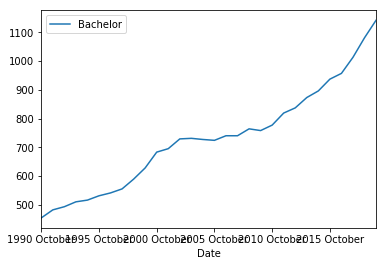

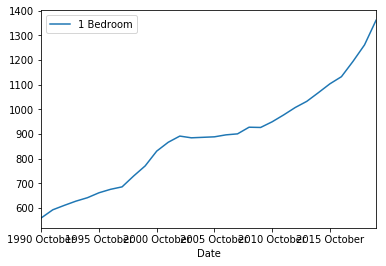

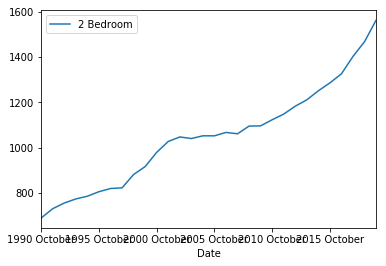

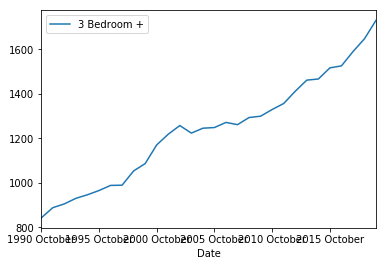

In [13]:
data.plot(kind='line',x='Date',y='Bachelor')
data.plot(kind='line',x='Date',y='1 Bedroom')
data.plot(kind='line',x='Date',y='2 Bedroom')
data.plot(kind='line',x='Date',y='3 Bedroom +')

All apartment types were analyzed on a trend from 1990-2019. Although there exists some fluctiations. It is very clear that rental prices have more than doubled over the past 20 years, with significant growth over the years. Where 3 Bedroom + and 1 bedroom experienced the most increase.

In [16]:
source = requests.get('https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/Table?TableId=2.2.11&GeographyId=2270&GeographyTypeId=3&DisplayAs=Table&GeograghyName=Toronto').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>Full view</title>


Bachelor 
 1 Bedroom 
 2 Bedroom 
 3 Bedroom + 
 Total 
 
 
 
 1990 October 
 454 
 a 
 559 
 a 
 689 
 a 
 842 
 a 
 634 
 a 
 1991 October 
 482 
 a 
 592 
 a 
 730 
 a 
 888 
 a 
 672 
 a 
 1992 October 
 493 
 a 
 610 
 a 
 755 
 a 
 905 
 a 
 691 
 a 
 1993 October 
 510 
 a 
 627 
 a 
 773 
 a 
 930 
 a 
 710 
 a 
 1994 October 
 516 
 a 
 641 
 a 
 785 
 a 
 946 
 a 
 722 
 a 
 1995 October 
 531 
 a 
 661 
 a 
 805 
 a 
 965 
 a 
 741 
 a 
 1996 October 
 541 
 a 
 675 
 a 
 819 
 a 
 988 
 a 
 755 
 a 
 1997 October 
 555 
 a 
 685 
 a 
 822 
 a 
 989 
 a 
 762 
 a 
 1998 October 
 589 
 a 
 729 
 a 
 881 
 a 
 1,053 
 a 
 813 
 a 
 1999 October 
 628 
 a 
 770 
 a 
 916 
 a 
 1,086 
 a 
 850 
 a 
 2000 October 
 683 
 a 
 830 
 a 
 979 
 a 
 1,170 
 a 
 913 
 a 
 2001 October 
 695 
 a 
 866 
 a 
 1,027 
 a 
 1,218 
 a 
 954 
 a 
 2002 October 
 729 
 a 
 891 
 a 
 1,047 
 a 
 1,257 
 a 
 981 
 a 
 2003 October 
 731 
 a 
 884 
 a 
 1,040 
 a 
 1,223 
 a 
 970 
 a 
 2004 October 
 727 
 a 
 886 
 a 
 1,052 
 a 
 1,245 
 a 
 980 
 a 
 2005 October 
 724 
 a 
 888 
 a 
 1,052 
 a 
 1,248 
 a 
 979 
 a 
 2006 October 
 740 
 a 
 896 
 a 
 1,067 
 a 
 1,271 
 a 
 995 
 a 
 2007 October 
 740 
 a 
 900 
 a 
 1,061 
 a 
 1,261 
 a 
 992 
 a 
 2008 October 
 764 
 a 
 927 
 a 
 1,095 
 a 
 1,293 
 a 
 1,021 
 a 
 2009 October 
 758 
 a 
 926 
 a 
 1,096 
 a 
 1,299 
 a 
 1,018 
 a 
 2010 October 
 777 
 a 
 949 
 a 
 1,123 
 a 
 1,329 
 a 
 1,048 
 a 
 2011 October 
 819 
 a 
 977 
 a 
 1,148 
 a 
 1,356 
 a 
 1,073 
 a 
 2012 October 
 837 
 a 
 1,007 
 a 
 1,183 
 a 
 1,411 
 a 
 1,108 
 a 
 2013 October 
 873 
 a 
 1,032 
 a 
 1,211 
 a 
 1,461 
 a 
 1,138 
 a 
 2014 October 
 896 
 a 
 1,067 
 a 
 1,251 
 a 
 1,466 
 a 
 1,170 
 a 
 2015 October 
 937 
 a 
 1,103 
 a 
 1,286 
 a 
 1,516 
 a 
 1,208 
 a 
 2016 October 
 957 
 a 
 1,132 
 a 
 1,326 
 a 
 1,525 
 a 
 1,240 
 a 
 2017 October 
 1,013 
 a 
 1,194 
 a 
 1,403 
 a 
 1,589 
 a 
 1,308 
 a 
 2018 October 
 1,081 
 a 
 1,261 
 a 
 1,468 
 a 
 1,647 
 a 
 1,370 
 a 
 2019 October 
 1,142 
 a 
 1,361 
 a 
 1,563 
 a 
 1,730 
 a 
 1,465 
 a

### By Region

In [22]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_17c43b7839644eac87dab29c7e54f742 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ei59TFv0hMeRVSiO1cRI1SeysefTj7rp04HP_Z7uo2aR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_17c43b7839644eac87dab29c7e54f742.get_object(Bucket='finalreport-donotdelete-pr-teutudhwysl3nm',Key='BY REGION.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Unnamed: 0,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
0,Agincourt/Malvern,**,"1,234","1,397","1,414","1,352"
1,Ajax/Pickering,**,982,"1,237","1,489","1,318"
2,Alderwood,**,"1,193","1,357",**,"1,320"
3,Aurora,**,"1,171","1,371",**,"1,338"
4,Banbury-Don Mills/York Mills,836,"1,266","1,432","1,763","1,382"


In [25]:
indexNum = df_data_1[df_data_1['Bachelor'] == '**'].index
df_data_1.drop(indexNum, inplace = True)
df_data_1.head(10)

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
4,Banbury-Don Mills/York Mills,836,"1,266","1,432","1,763","1,382"
5,Bathurst Manor,888,"1,329","1,427","1,599","1,427"
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"
9,Bedford Park-Nortown,"1,000","1,188","1,511","2,039","1,354"
10,Beechborough-Greenbrook,887,"1,044","1,309",**,"1,170"
11,Bendale,"1,076","1,341","1,419","1,576","1,445"
12,Birchcliffe-Cliffside,954,"1,282","1,517",**,"1,395"
13,Black Creek,"1,089","1,156","1,355","1,596","1,348"
14,Bradford/West Gwillimbury/New Tecumseth,"1,087","1,111","1,268","1,533","1,235"
16,Brampton (West),902,"1,186","1,367","1,581","1,315"


In [26]:
indexNum = df_data_1[df_data_1['1 Bedroom'] == '**'].index
df_data_1.drop(indexNum, inplace = True)
df_data_1.head(10)

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
4,Banbury-Don Mills/York Mills,836,"1,266","1,432","1,763","1,382"
5,Bathurst Manor,888,"1,329","1,427","1,599","1,427"
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"
9,Bedford Park-Nortown,"1,000","1,188","1,511","2,039","1,354"
10,Beechborough-Greenbrook,887,"1,044","1,309",**,"1,170"
11,Bendale,"1,076","1,341","1,419","1,576","1,445"
12,Birchcliffe-Cliffside,954,"1,282","1,517",**,"1,395"
13,Black Creek,"1,089","1,156","1,355","1,596","1,348"
14,Bradford/West Gwillimbury/New Tecumseth,"1,087","1,111","1,268","1,533","1,235"
16,Brampton (West),902,"1,186","1,367","1,581","1,315"


In [27]:
indexNum = df_data_1[df_data_1['2 Bedroom'] == '**'].index
df_data_1.drop(indexNum, inplace = True)
df_data_1.head(10)

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
4,Banbury-Don Mills/York Mills,836,"1,266","1,432","1,763","1,382"
5,Bathurst Manor,888,"1,329","1,427","1,599","1,427"
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"
9,Bedford Park-Nortown,"1,000","1,188","1,511","2,039","1,354"
10,Beechborough-Greenbrook,887,"1,044","1,309",**,"1,170"
11,Bendale,"1,076","1,341","1,419","1,576","1,445"
12,Birchcliffe-Cliffside,954,"1,282","1,517",**,"1,395"
13,Black Creek,"1,089","1,156","1,355","1,596","1,348"
14,Bradford/West Gwillimbury/New Tecumseth,"1,087","1,111","1,268","1,533","1,235"
16,Brampton (West),902,"1,186","1,367","1,581","1,315"


In [28]:
indexNum = df_data_1[df_data_1['3 Bedroom +'] == '**'].index
df_data_1.drop(indexNum, inplace = True)
df_data_1.head(10)

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
4,Banbury-Don Mills/York Mills,836,"1,266","1,432","1,763","1,382"
5,Bathurst Manor,888,"1,329","1,427","1,599","1,427"
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"
9,Bedford Park-Nortown,"1,000","1,188","1,511","2,039","1,354"
11,Bendale,"1,076","1,341","1,419","1,576","1,445"
13,Black Creek,"1,089","1,156","1,355","1,596","1,348"
14,Bradford/West Gwillimbury/New Tecumseth,"1,087","1,111","1,268","1,533","1,235"
16,Brampton (West),902,"1,186","1,367","1,581","1,315"
17,Briar Hill-Belgravia,893,"1,333","1,525","1,878","1,433"
24,Casa Loma,"1,259","1,592","2,218","3,455","1,980"


In [29]:
df_data_1.rename(columns={'Unnamed: 0':'Neighbourhoods'}, inplace=True)
df_data_1.columns

Index(['Neighbourhoods', 'Bachelor', '1 Bedroom', '2 Bedroom', '3 Bedroom +',
       'Total'],
      dtype='object')

In [30]:
df_data_1.head(5)

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
4,Banbury-Don Mills/York Mills,836,"1,266","1,432","1,763","1,382"
5,Bathurst Manor,888,"1,329","1,427","1,599","1,427"
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"
9,Bedford Park-Nortown,"1,000","1,188","1,511","2,039","1,354"
11,Bendale,"1,076","1,341","1,419","1,576","1,445"


In [42]:
minValue_1Bedroom = df_data_1['1 Bedroom'].min()
print(minValue_1Bedroom)

1,015


In [52]:
df_data_1.loc[df_data_1['1 Bedroom'] == '1,015']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
102,Rockcliffe-Smythe,863,"1,015","1,171","1,394","1,096"


In [44]:
minValue_2Bedroom = df_data_1['2 Bedroom'].min()
print(minValue_2Bedroom)

1,145


In [53]:
df_data_1.loc[df_data_1['2 Bedroom'] == '1,145']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
99,Rexdale-Kipling,734,968,"1,145","1,385","1,170"


In [45]:
minValue_3Bedroom = df_data_1['3 Bedroom +'].min()
print(minValue_3Bedroom)

1,385


In [54]:
df_data_1.loc[df_data_1['3 Bedroom +'] == '1,385']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
99,Rexdale-Kipling,734,968,"1,145","1,385","1,170"


In [50]:
minValue_Bachelor = df_data_1['Bachelor'].min()
print(minValue_Bachelor)

1,000


In [73]:
df_data_1.loc[df_data_1['Bachelor'] == '836']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
4,Banbury-Don Mills/York Mills,836,"1,266","1,432","1,763","1,382"


In [59]:
maxValue_1Bedroom = df_data_1['1 Bedroom'].max()
print(maxValue_1Bedroom)

968


In [72]:
df_data_1.loc[df_data_1['1 Bedroom'] == '2,197']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"


In [58]:
maxValue_2Bedroom = df_data_1['2 Bedroom'].max()
print(maxValue_2Bedroom)

3,047


In [71]:
df_data_1.loc[df_data_1['2 Bedroom'] == '3,047']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"


In [62]:
maxValue_3Bedroom = df_data_1['3 Bedroom +'].max()
print(maxValue_3Bedroom)

3,571


In [70]:
df_data_1.loc[df_data_1['3 Bedroom +'] == '3,571']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"


In [65]:
maxValue_Bachelor = df_data_1['Bachelor'].max()
print(maxValue_Bachelor)

992


In [69]:
df_data_1.loc[df_data_1['Bachelor'] == '1,751']

,Neighbourhoods,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
6,Bay Street Corridor,"1,751","2,197","3,047","3,571","2,382"
